In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

eval_df = pd.read_csv("output_results.csv")

In [2]:
label_encoder = LabelEncoder()
eval_df = eval_df[['primary_emotion','direct_or_indirect','roberta_eval','phi_eval']]
eval_df['emotion_encoded'] = label_encoder.fit_transform(eval_df['primary_emotion'])
eval_df['roberta_encoded'] = label_encoder.fit_transform(eval_df['roberta_eval'])
eval_df['phi_encoded'] = label_encoder.fit_transform(eval_df['phi_eval'])

In [3]:
roberta_conf_matrix = confusion_matrix(eval_df['emotion_encoded'], eval_df['roberta_encoded'])
phi_conf_matrix = confusion_matrix(eval_df['emotion_encoded'], eval_df['phi_encoded'])

         angry  happy  neutral  sad
angry        6      0        1    1
happy        0      8        0    0
neutral      0      1        2    1
sad          0      1        3    4


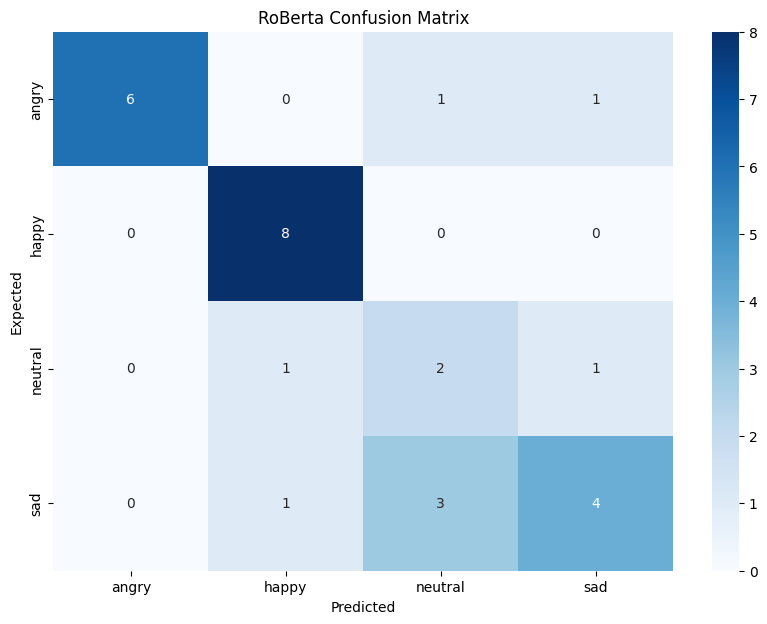

In [8]:
roberta_conf_matrix_df = pd.DataFrame(roberta_conf_matrix, 
                              index=label_encoder.classes_, 
                              columns=label_encoder.classes_)

# Print the confusion matrix
print(roberta_conf_matrix_df)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(roberta_conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('RoBerta Confusion Matrix')
plt.show()

         angry  happy  neutral  sad
angry        8      0        0    0
happy        0      8        0    0
neutral      0      0        4    0
sad          0      0        0    8


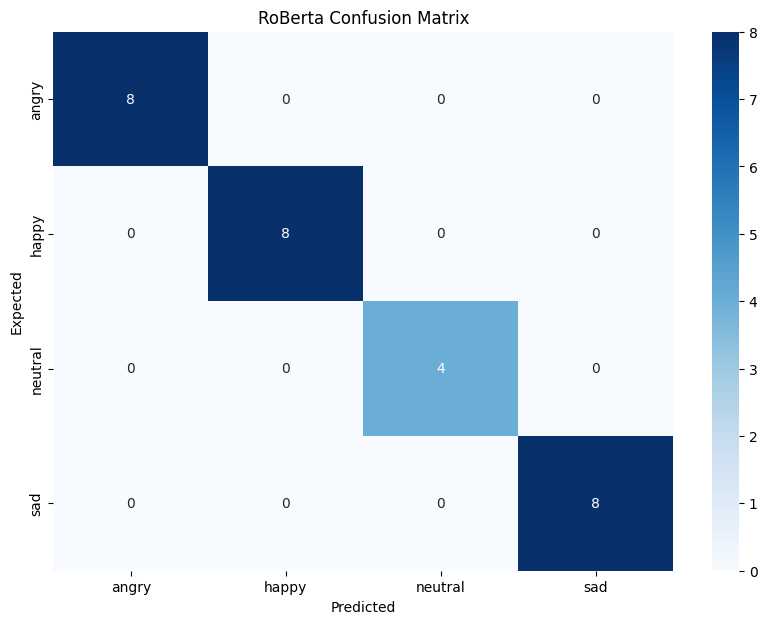

In [7]:
phi_conf_matrix_df = pd.DataFrame(phi_conf_matrix, 
                              index=label_encoder.classes_, 
                              columns=label_encoder.classes_)

# Print the confusion matrix
print(phi_conf_matrix_df)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(phi_conf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.title('RoBerta Confusion Matrix')
plt.show()